In [1]:
import time

import gym
import gym_snake
from ml_tools import q_learning

import numpy as np
import matplotlib.pyplot as plt

from ml_tools.ui import UI

ui = UI()
ui.connect("./public")

'127.0.0.1:52496'

In [2]:
model_name = "01_model_game-trained"

# brain_name = "baseline"
brain_name = "pre-trained/baseline"
# brain_name = "pre-trained/all-trainable"

load_pre_trained = True

In [4]:
from brain.v2.brain import Brain
from preprocessor.v1.preprocessor import Preprocessor

preprocessor = Preprocessor()
preprocessor.ui = ui
brain = Brain(learning_rate=0.0001)
brain.ui = ui

if load_pre_trained:
  pre_trained_name = "pre-trained"
  pre_trained_model_name = "00_model_pre-trained"
  
  brain.load_layers_and_compile_model(
    name=pre_trained_name, model_name=pre_trained_model_name, 
    num_layers=6, trainable=False
  )
  print("")
else:
  brain.build_and_compile_model()

brain.model.summary()

Loaded layer:
input_1
conv2d
max_pooling2d
conv2d_1
max_pooling2d_1
flatten

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 11, 11, 32)        6176      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 6, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2, 64)          32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 64)         0         
 2D)                                                             
                                                  

In [5]:
agent = q_learning.Agent(
  action_space=[0, 1, 2, 3],

  brain=brain, preprocessor=preprocessor,

  epsilon_start = 1,
  epsilon_stop = 0.001,
  epsilon_decay_num_steps = 1_000,
  
  discount_factor=0.97,
  
  replay_batch_size=32*2,
  model_batch_size=16,

  steps_to_train=20,
  steps_to_update_target=40,

  replay_memory_max_len=50_000,
  replay_memory_min_len= 2_000,
)

env = gym.make("snake-v0")

score = 0
scores = []
epsilons = []

game_num = 0

In [8]:
raw_observation = env.reset()
agent.reset(raw_observation)

while True:
  if game_num == 5_000:
    break
    
  ui.video.update_stream("raw", raw_observation)

  speed = int(ui.control.get_value("speed") or 100)
  if speed != 100:
    time.sleep(1 / speed)

  agent.training = True if (ui.control.get_value("training") or "true") == "true" else False
  action = agent.act()
  raw_next_observation, reward, done, info = env.step(action)
  agent.step(reward, raw_next_observation)
  score += reward

  raw_observation = raw_next_observation
  if done:
    scores.append(score)
    epsilons.append(agent.epsilon)
    score = 0

    game_num += 1

    raw_observation = env.reset()
    agent.reset(raw_observation)

4/4 [==============================] - 0s 3ms/step - loss: 0.0040


4/4 [==============================] - 0s 2ms/step - loss: 0.0026


4/4 [==============================] - 0s 2ms/step - loss: 5.2549e-04


4/4 [==============================] - 0s 2ms/step - loss: 7.5513e-04


4/4 [==============================] - 0s 2ms/step - loss: 0.0037


4/4 [==============================] - 0s 2ms/step - loss: 2.5778e-04


4/4 [==============================] - 0s 2ms/step - loss: 2.5962e-04


4/4 [==============================] - 0s 2ms/step - loss: 3.9284e-04


4/4 [==============================] - 0s 2ms/step - loss: 3.6135e-04


4/4 [==============================] - 0s 3ms/step - loss: 2.0694e-04


4/4 [==============================] - 0s 2ms/step - loss: 0.0033


4/4 [==============================] - 0s 2ms/step - loss: 1.8243e-04


4/4 [==============================] - 0s 2ms/step - loss: 2.3036e-04


4/4 [==============================] - 0s 3ms/step - loss: 1.4584e-04


4/4 [==============================] - 0s 2ms/step - loss: 1.8938e-04


4/4 [==============================] - 0s 2ms/step - loss: 2.2226e-04


4/4 [==============================] - 0s 3ms/step - loss: 0.0031


4/4 [==============================] - 0s 2ms/step - loss: 1.7324e-04


4/4 [==============================] - 0s 3ms/step - loss: 1.6825e-04


4/4 [==============================] - 0s 2ms/step - loss: 1.3374e-04


4/4 [==============================] - 0s 3ms/step - loss: 0.0039


4/4 [==============================] - 0s 2ms/step - loss: 0.0026


4/4 [==============================] - 0s 3ms/step - loss: 2.1215e-04


4/4 [==============================] - 0s 2ms/step - loss: 3.0754e-04


4/4 [==============================] - 0s 2ms/step - loss: 3.6948e-04


4/4 [==============================] - 0s 2ms/step - loss: 2.9949e-04


4/4 [==============================] - 0s 4ms/step - loss: 2.4859e-04


4/4 [==============================] - 0s 3ms/step - loss: 0.0036


4/4 [==============================] - 0s 2ms/step - loss: 6.3214e-04


4/4 [==============================] - 0s 2ms/step - loss: 0.0046


4/4 [==============================] - 0s 2ms/step - loss: 4.0058e-04


4/4 [==============================] - 0s 3ms/step - loss: 5.7564e-04


4/4 [==============================] - 0s 2ms/step - loss: 5.5004e-04


4/4 [==============================] - 0s 2ms/step - loss: 0.0039


4/4 [==============================] - 0s 2ms/step - loss: 0.0020


4/4 [==============================] - 0s 2ms/step - loss: 2.4602e-04


4/4 [==============================] - 0s 2ms/step - loss: 5.7225e-04


4/4 [==============================] - 0s 2ms/step - loss: 3.8417e-04


4/4 [==============================] - 0s 3ms/step - loss: 0.0015


4/4 [==============================] - 0s 2ms/step - loss: 4.7772e-04


4/4 [==============================] - 0s 2ms/step - loss: 0.0036


4/4 [==============================] - 0s 2ms/step - loss: 6.3570e-04


4/4 [==============================] - 0s 2ms/step - loss: 4.0008e-04


4/4 [==============================] - 0s 2ms/step - loss: 8.0600e-04


4/4 [==============================] - 0s 2ms/step - loss: 0.0077


4/4 [==============================] - 0s 1ms/step - loss: 0.0016


4/4 [==============================] - 0s 2ms/step - loss: 7.0121e-04


4/4 [==============================] - 0s 1ms/step - loss: 6.4568e-04


4/4 [==============================] - 0s 2ms/step - loss: 6.0309e-04


4/4 [==============================] - 0s 2ms/step - loss: 4.0950e-04


4/4 [==============================] - 0s 1ms/step - loss: 0.0075


4/4 [==============================] - 0s 1ms/step - loss: 0.0035


4/4 [==============================] - 0s 2ms/step - loss: 0.0050


4/4 [==============================] - 0s 1ms/step - loss: 6.3490e-04


4/4 [==============================] - 0s 1ms/step - loss: 0.0022


4/4 [==============================] - 0s 2ms/step - loss: 0.0010


4/4 [==============================] - 0s 1ms/step - loss: 8.3944e-04


4/4 [==============================] - 0s 2ms/step - loss: 0.0019


4/4 [==============================] - 0s 1ms/step - loss: 0.0030


4/4 [==============================] - 0s 2ms/step - loss: 0.0040


4/4 [==============================] - 0s 2ms/step - loss: 0.0019


4/4 [==============================] - 0s 2ms/step - loss: 0.0015


4/4 [==============================] - 0s 2ms/step - loss: 0.0048


4/4 [==============================] - 0s 2ms/step - loss: 0.0014


4/4 [==============================] - 0s 2ms/step - loss: 0.0048


4/4 [==============================] - 0s 2ms/step - loss: 8.3934e-04


4/4 [==============================] - 0s 1ms/step - loss: 0.0050


4/4 [==============================] - 0s 1ms/step - loss: 0.0028


4/4 [==============================] - 0s 2ms/step - loss: 0.0013


4/4 [==============================] - 0s 2ms/step - loss: 9.7246e-04


4/4 [==============================] - 0s 1ms/step - loss: 0.0055


4/4 [==============================] - 0s 2ms/step - loss: 0.0014


4/4 [==============================] - 0s 2ms/step - loss: 0.0070


4/4 [==============================] - 0s 2ms/step - loss: 0.0032


4/4 [==============================] - 0s 2ms/step - loss: 0.0023


4/4 [==============================] - 0s 2ms/step - loss: 0.0046


4/4 [==============================] - 0s 2ms/step - loss: 0.0042


4/4 [==============================] - 0s 1ms/step - loss: 0.0062


4/4 [==============================] - 0s 2ms/step - loss: 0.0029


4/4 [==============================] - 0s 2ms/step - loss: 0.0035


4/4 [==============================] - 0s 1ms/step - loss: 0.0036


4/4 [==============================] - 0s 2ms/step - loss: 0.0013


4/4 [==============================] - 0s 2ms/step - loss: 0.0014


4/4 [==============================] - 0s 1ms/step - loss: 0.0010


4/4 [==============================] - 0s 2ms/step - loss: 0.0043


4/4 [==============================] - 0s 2ms/step - loss: 0.0130


4/4 [==============================] - 0s 2ms/step - loss: 9.8055e-04


4/4 [==============================] - 0s 2ms/step - loss: 0.0052


4/4 [==============================] - 0s 2ms/step - loss: 0.0112


4/4 [==============================] - 0s 1ms/step - loss: 0.0040


4/4 [==============================] - 0s 2ms/step - loss: 0.0013


4/4 [==============================] - 0s 2ms/step - loss: 0.0057


4/4 [==============================] - 0s 1ms/step - loss: 0.0013


4/4 [==============================] - 0s 2ms/step - loss: 0.0013


4/4 [==============================] - 0s 1ms/step - loss: 0.0039


4/4 [==============================] - 0s 2ms/step - loss: 0.0013


4/4 [==============================] - 0s 2ms/step - loss: 0.0030


4/4 [==============================] - 0s 2ms/step - loss: 0.0015


4/4 [==============================] - 0s 2ms/step - loss: 0.0016


4/4 [==============================] - 0s 1ms/step - loss: 0.0026


4/4 [==============================] - 0s 2ms/step - loss: 0.0030


4/4 [==============================] - 0s 2ms/step - loss: 0.0034


4/4 [==============================] - 0s 2ms/step - loss: 0.0030


4/4 [==============================] - 0s 2ms/step - loss: 0.0056


4/4 [==============================] - 0s 2ms/step - loss: 0.0034


4/4 [==============================] - 0s 2ms/step - loss: 0.0033


4/4 [==============================] - 0s 2ms/step - loss: 0.0058


4/4 [==============================] - 0s 2ms/step - loss: 0.0026


4/4 [==============================] - 0s 1ms/step - loss: 0.0050


4/4 [==============================] - 0s 2ms/step - loss: 0.0022


4/4 [==============================] - 0s 2ms/step - loss: 0.0071


4/4 [==============================] - 0s 2ms/step - loss: 0.0047


4/4 [==============================] - 0s 1ms/step - loss: 0.0021


4/4 [==============================] - 0s 2ms/step - loss: 0.0096


4/4 [==============================] - 0s 1ms/step - loss: 0.0077


4/4 [==============================] - 0s 2ms/step - loss: 0.0088


4/4 [==============================] - 0s 2ms/step - loss: 0.0072


4/4 [==============================] - 0s 2ms/step - loss: 0.0041


4/4 [==============================] - 0s 2ms/step - loss: 0.0086


4/4 [==============================] - 0s 2ms/step - loss: 0.0106


4/4 [==============================] - 0s 2ms/step - loss: 0.0041


4/4 [==============================] - 0s 2ms/step - loss: 0.0097


4/4 [==============================] - 0s 2ms/step - loss: 0.0064


4/4 [==============================] - 0s 2ms/step - loss: 0.0086


4/4 [==============================] - 0s 2ms/step - loss: 0.0035


4/4 [==============================] - 0s 2ms/step - loss: 0.0080


4/4 [==============================] - 0s 1ms/step - loss: 0.0115


4/4 [==============================] - 0s 2ms/step - loss: 0.0029


4/4 [==============================] - 0s 1ms/step - loss: 0.0063


4/4 [==============================] - 0s 2ms/step - loss: 0.0085


4/4 [==============================] - 0s 2ms/step - loss: 0.0083


4/4 [==============================] - 0s 1ms/step - loss: 0.0029


4/4 [==============================] - 0s 2ms/step - loss: 0.0049


4/4 [==============================] - 0s 2ms/step - loss: 0.0027


4/4 [==============================] - 0s 2ms/step - loss: 0.0170


4/4 [==============================] - 0s 2ms/step - loss: 0.0108


4/4 [==============================] - 0s 2ms/step - loss: 0.0054


4/4 [==============================] - 0s 2ms/step - loss: 0.0100


4/4 [==============================] - 0s 2ms/step - loss: 0.0047


4/4 [==============================] - 0s 2ms/step - loss: 0.0118


4/4 [==============================] - 0s 2ms/step - loss: 0.0127


4/4 [==============================] - 0s 2ms/step - loss: 0.0032


4/4 [==============================] - 0s 2ms/step - loss: 0.0105


4/4 [==============================] - 0s 4ms/step - loss: 0.0076


4/4 [==============================] - 0s 2ms/step - loss: 0.0084


4/4 [==============================] - 0s 2ms/step - loss: 0.0085


4/4 [==============================] - 0s 2ms/step - loss: 0.0050


4/4 [==============================] - 0s 2ms/step - loss: 0.0059


4/4 [==============================] - 0s 2ms/step - loss: 0.0066


4/4 [==============================] - 0s 2ms/step - loss: 0.0179


4/4 [==============================] - 0s 2ms/step - loss: 0.0041


4/4 [==============================] - 0s 2ms/step - loss: 0.0075


4/4 [==============================] - 0s 2ms/step - loss: 0.0079


4/4 [==============================] - 0s 2ms/step - loss: 0.0083


4/4 [==============================] - 0s 1ms/step - loss: 0.0150


4/4 [==============================] - 0s 2ms/step - loss: 0.0085


4/4 [==============================] - 0s 2ms/step - loss: 0.0174


4/4 [==============================] - 0s 1ms/step - loss: 0.0065


4/4 [==============================] - 0s 1ms/step - loss: 0.0065


4/4 [==============================] - 0s 1ms/step - loss: 0.0090


4/4 [==============================] - 0s 1ms/step - loss: 0.0052


4/4 [==============================] - 0s 1ms/step - loss: 0.0096


4/4 [==============================] - 0s 1ms/step - loss: 0.0115


4/4 [==============================] - 0s 1ms/step - loss: 0.0086


4/4 [==============================] - 0s 1ms/step - loss: 0.0050


4/4 [==============================] - 0s 1ms/step - loss: 0.0073


4/4 [==============================] - 0s 1ms/step - loss: 0.0053


4/4 [==============================] - 0s 1ms/step - loss: 0.0118


4/4 [==============================] - 0s 1ms/step - loss: 0.0069


4/4 [==============================] - 0s 1ms/step - loss: 0.0191


4/4 [==============================] - 0s 1ms/step - loss: 0.0130


4/4 [==============================] - 0s 1ms/step - loss: 0.0161


4/4 [==============================] - 0s 1ms/step - loss: 0.0113


4/4 [==============================] - 0s 1ms/step - loss: 0.0042


4/4 [==============================] - 0s 1ms/step - loss: 0.0046


4/4 [==============================] - 0s 1ms/step - loss: 0.0052


4/4 [==============================] - 0s 1ms/step - loss: 0.0047


4/4 [==============================] - 0s 1ms/step - loss: 0.0038


4/4 [==============================] - 0s 1ms/step - loss: 0.0151


4/4 [==============================] - 0s 2ms/step - loss: 0.0068


4/4 [==============================] - 0s 1ms/step - loss: 0.0072


4/4 [==============================] - 0s 1ms/step - loss: 0.0104


4/4 [==============================] - 0s 1ms/step - loss: 0.0070


4/4 [==============================] - 0s 1ms/step - loss: 0.0100


4/4 [==============================] - 0s 1ms/step - loss: 0.0057


4/4 [==============================] - 0s 1ms/step - loss: 0.0114


4/4 [==============================] - 0s 1ms/step - loss: 0.0198


4/4 [==============================] - 0s 1ms/step - loss: 0.0080


4/4 [==============================] - 0s 1ms/step - loss: 0.0125


4/4 [==============================] - 0s 1ms/step - loss: 0.0088


4/4 [==============================] - 0s 1ms/step - loss: 0.0106


4/4 [==============================] - 0s 2ms/step - loss: 0.0042


4/4 [==============================] - 0s 1ms/step - loss: 0.0150


4/4 [==============================] - 0s 1ms/step - loss: 0.0074


4/4 [==============================] - 0s 1ms/step - loss: 0.0121


4/4 [==============================] - 0s 1ms/step - loss: 0.0077


4/4 [==============================] - 0s 1ms/step - loss: 0.0127


4/4 [==============================] - 0s 1ms/step - loss: 0.0083


4/4 [==============================] - 0s 1ms/step - loss: 0.0182


4/4 [==============================] - 0s 1ms/step - loss: 0.0102


4/4 [==============================] - 0s 1ms/step - loss: 0.0141


4/4 [==============================] - 0s 1ms/step - loss: 0.0129


4/4 [==============================] - 0s 1ms/step - loss: 0.0052


4/4 [==============================] - 0s 2ms/step - loss: 0.0066


4/4 [==============================] - 0s 1ms/step - loss: 0.0122


4/4 [==============================] - 0s 1ms/step - loss: 0.0305


4/4 [==============================] - 0s 1ms/step - loss: 0.0122


4/4 [==============================] - 0s 1ms/step - loss: 0.0055


4/4 [==============================] - 0s 2ms/step - loss: 0.0174


4/4 [==============================] - 0s 1ms/step - loss: 0.0054


4/4 [==============================] - 0s 1ms/step - loss: 0.0065


4/4 [==============================] - 0s 1ms/step - loss: 0.0069


4/4 [==============================] - 0s 1ms/step - loss: 0.0195


4/4 [==============================] - 0s 1ms/step - loss: 0.0098


4/4 [==============================] - 0s 1ms/step - loss: 0.0181


4/4 [==============================] - 0s 1ms/step - loss: 0.0049


4/4 [==============================] - 0s 1ms/step - loss: 0.0055


4/4 [==============================] - 0s 1ms/step - loss: 0.0070


4/4 [==============================] - 0s 1ms/step - loss: 0.0051


4/4 [==============================] - 0s 1ms/step - loss: 0.0116


4/4 [==============================] - 0s 1ms/step - loss: 0.0166


4/4 [==============================] - 0s 1ms/step - loss: 0.0059


4/4 [==============================] - 0s 1ms/step - loss: 0.0116


4/4 [==============================] - 0s 1ms/step - loss: 0.0115


4/4 [==============================] - 0s 1ms/step - loss: 0.0112


4/4 [==============================] - 0s 1ms/step - loss: 0.0068


4/4 [==============================] - 0s 1ms/step - loss: 0.0130


4/4 [==============================] - 0s 1ms/step - loss: 0.0095


4/4 [==============================] - 0s 1ms/step - loss: 0.0083


4/4 [==============================] - 0s 1ms/step - loss: 0.0130


4/4 [==============================] - 0s 1ms/step - loss: 0.0145


4/4 [==============================] - 0s 2ms/step - loss: 0.0155


4/4 [==============================] - 0s 1ms/step - loss: 0.0068


4/4 [==============================] - 0s 1ms/step - loss: 0.0099


4/4 [==============================] - 0s 2ms/step - loss: 0.0118


4/4 [==============================] - 0s 1ms/step - loss: 0.0108


4/4 [==============================] - 0s 1ms/step - loss: 0.0038


4/4 [==============================] - 0s 1ms/step - loss: 0.0065


4/4 [==============================] - 0s 1ms/step - loss: 0.0067


4/4 [==============================] - 0s 1ms/step - loss: 0.0049


4/4 [==============================] - 0s 1ms/step - loss: 0.0074


4/4 [==============================] - 0s 1ms/step - loss: 0.0151


4/4 [==============================] - 0s 1ms/step - loss: 0.0065


4/4 [==============================] - 0s 1ms/step - loss: 0.0072


4/4 [==============================] - 0s 1ms/step - loss: 0.0051


4/4 [==============================] - 0s 1ms/step - loss: 0.0161


4/4 [==============================] - 0s 1ms/step - loss: 0.0056


4/4 [==============================] - 0s 1ms/step - loss: 0.0096


4/4 [==============================] - 0s 1ms/step - loss: 0.0128


4/4 [==============================] - 0s 1ms/step - loss: 0.0222


4/4 [==============================] - 0s 1ms/step - loss: 0.0051


4/4 [==============================] - 0s 1ms/step - loss: 0.0072


4/4 [==============================] - 0s 1ms/step - loss: 0.0093


4/4 [==============================] - 0s 1ms/step - loss: 0.0078


4/4 [==============================] - 0s 1ms/step - loss: 0.0178


4/4 [==============================] - 0s 1ms/step - loss: 0.0161


4/4 [==============================] - 0s 1ms/step - loss: 0.0061


4/4 [==============================] - 0s 2ms/step - loss: 0.0142


4/4 [==============================] - 0s 1ms/step - loss: 0.0098


4/4 [==============================] - 0s 1ms/step - loss: 0.0079


4/4 [==============================] - 0s 1ms/step - loss: 0.0152


4/4 [==============================] - 0s 1ms/step - loss: 0.0111


4/4 [==============================] - 0s 1ms/step - loss: 0.0087


4/4 [==============================] - 0s 1ms/step - loss: 0.0097


4/4 [==============================] - 0s 1ms/step - loss: 0.0190


4/4 [==============================] - 0s 1ms/step - loss: 0.0073


4/4 [==============================] - 0s 1ms/step - loss: 0.0070


4/4 [==============================] - 0s 1ms/step - loss: 0.0150


4/4 [==============================] - 0s 1ms/step - loss: 0.0045


4/4 [==============================] - 0s 1ms/step - loss: 0.0070


4/4 [==============================] - 0s 1ms/step - loss: 0.0068


4/4 [==============================] - 0s 2ms/step - loss: 0.0076


4/4 [==============================] - 0s 1ms/step - loss: 0.0094


4/4 [==============================] - 0s 1ms/step - loss: 0.0105


4/4 [==============================] - 0s 1ms/step - loss: 0.0149


4/4 [==============================] - 0s 1ms/step - loss: 0.0077


4/4 [==============================] - 0s 1ms/step - loss: 0.0089


4/4 [==============================] - 0s 1ms/step - loss: 0.0131


4/4 [==============================] - 0s 1ms/step - loss: 0.0077


4/4 [==============================] - 0s 1ms/step - loss: 0.0090


4/4 [==============================] - 0s 1ms/step - loss: 0.0099


4/4 [==============================] - 0s 1ms/step - loss: 0.0137


4/4 [==============================] - 0s 1ms/step - loss: 0.0169


4/4 [==============================] - 0s 1ms/step - loss: 0.0138


4/4 [==============================] - 0s 1ms/step - loss: 0.0134


4/4 [==============================] - 0s 1ms/step - loss: 0.0086


4/4 [==============================] - 0s 1ms/step - loss: 0.0133


4/4 [==============================] - 0s 1ms/step - loss: 0.0064


4/4 [==============================] - 0s 1ms/step - loss: 0.0066


4/4 [==============================] - 0s 1ms/step - loss: 0.0129


4/4 [==============================] - 0s 1ms/step - loss: 0.0077


4/4 [==============================] - 0s 1ms/step - loss: 0.0078


4/4 [==============================] - 0s 1ms/step - loss: 0.0127


4/4 [==============================] - 0s 1ms/step - loss: 0.0092


4/4 [==============================] - 0s 1ms/step - loss: 0.0088


4/4 [==============================] - 0s 1ms/step - loss: 0.0065


4/4 [==============================] - 0s 1ms/step - loss: 0.0090


4/4 [==============================] - 0s 1ms/step - loss: 0.0109


4/4 [==============================] - 0s 1ms/step - loss: 0.0114


4/4 [==============================] - 0s 1ms/step - loss: 0.0104


4/4 [==============================] - 0s 1ms/step - loss: 0.0063


4/4 [==============================] - 0s 1ms/step - loss: 0.0060


4/4 [==============================] - 0s 1ms/step - loss: 0.0076


4/4 [==============================] - 0s 1ms/step - loss: 0.0139


4/4 [==============================] - 0s 1ms/step - loss: 0.0056


4/4 [==============================] - 0s 1ms/step - loss: 0.0064


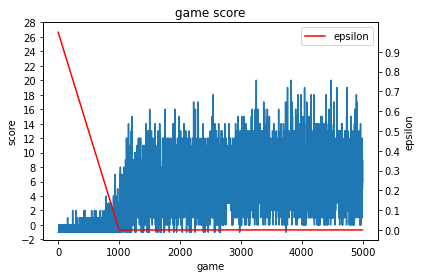

In [10]:
_, ax1 = plt.subplots()

plt.title("game score")
ax1.plot(scores)
ax1.set_xlabel("game")
ax1.set_ylabel("score")
ax1.set_yticks(np.arange(-2, 30, 2))

ax2 = ax1.twinx()
ax2.plot(epsilons, "r")
ax2.set_ylabel("epsilon")
ax2.set_yticks(np.arange(0, 1, 0.1))
ax2.legend(["epsilon"], loc="upper right")

plt.savefig(f"{brain.current_folder}/{brain_name}/game_score.jpg")
plt.show()

In [12]:
brain.save_model(name=brain_name, model_name=model_name)
agent.save_params(name=f"{brain.current_folder}/{brain_name}")

INFO:tensorflow:Assets written to: /Users/wiktorjurkiewicz/repos/00_PROJECTS/@_@_GENERAL/04_CODE/ML/snake-deep-q-learning/brain/v2/pre-trained/baseline/01_model_game-trained/assets


2022-04-20 06:16:12.735910: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
